# Preview the Data to see if Labels match image

Import neccessary libaries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

Define Directory

In [5]:
current_working_directory = os.getcwd()
parent_working_directory = os.path.dirname(current_working_directory) # go up one directory

new_image_directory = os.path.join(current_working_directory, "cars_train_new")
new_training_data_csv = os.path.join(current_working_directory, "cars_train_new_labels-512.csv")
car_meta_csv = os.path.join(parent_working_directory, "1-Read_From_MatLab_To_CSV", "cars_meta.csv")

Read CSV containing the new labels

In [6]:
df = pd.read_csv(new_training_data_csv)
print(df.head())

    filepath   x1   y1   x2   y2  class_name
0  00001.jpg   33  148  485  480          14
1  00002.jpg   20   87  493  445           3
2  00003.jpg   68  116  480  406          91
3  00004.jpg  151  145  361  404         134
4  00005.jpg   49  170  472  469         106


Load meta-data for mapping Label ID to Label Name

In [10]:
df_meta = pd.read_csv(car_meta_csv)
print(df_meta.head())

                   class_name
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012


Load Sample data

In [37]:
image_array = []
for i in range(64):
    filepath = df['filepath'][i]
    image_directory = os.path.join(new_image_directory, filepath)
    img = cv2.imread(image_directory, cv2.IMREAD_UNCHANGED)
    image_array.append(img)

Create and show plot

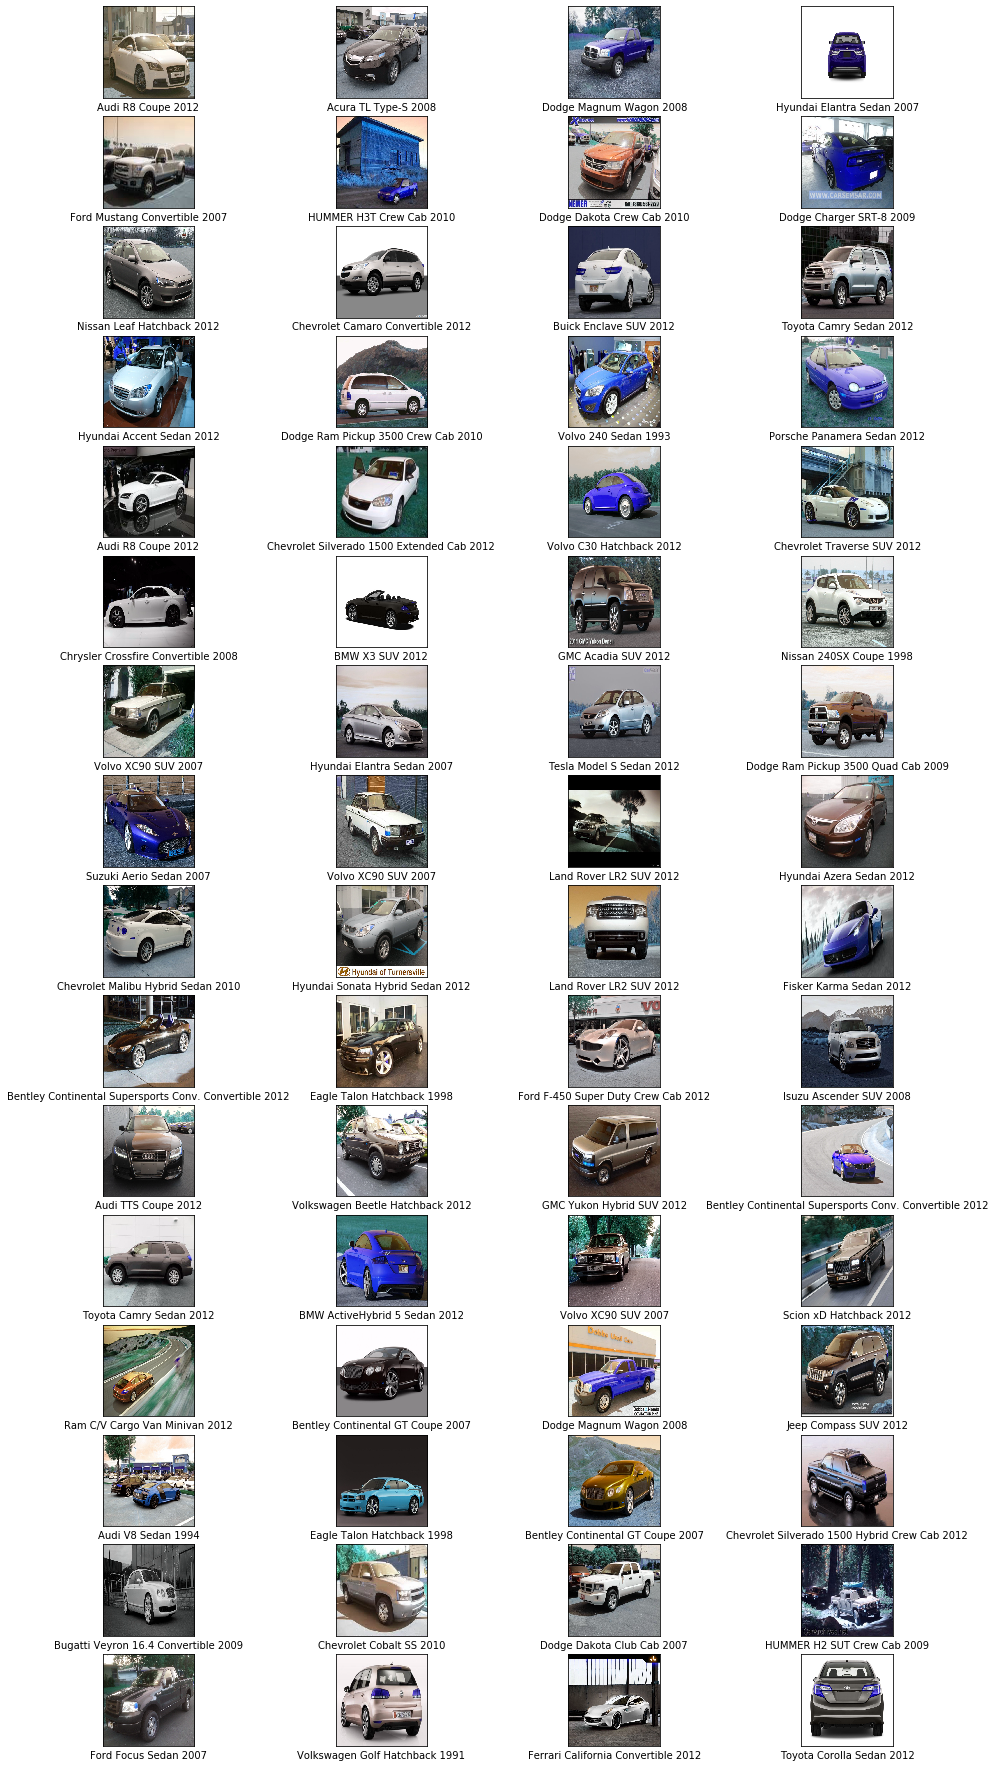

In [40]:
plt.figure(figsize=(16,32))

for i in range(64):
    plt.subplot(16,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_array[i], cmap=plt.cm.binary)
    class_id = df['class_name'][i]
    class_name = df_meta['class_name'][class_id]
    plt.xlabel(class_name)
    
plt.show()